## Tag Text

In this guide we are going to show you how to tag text using the PyMUSAS RuleBasedTagger so that you can extract token level USAS semantic tags from the tagged text. The guide is broken down into different languages, for each guide we are going to:

1. Download the relevant pre-configured PyMUSAS RuleBasedTagger spaCy component for the language.
2. Download and use a Natural Language Processing (NLP) pipeline that will tokenise, lemmatise, and Part Of Speech (POS) tag. In most cases this will be a spaCy pipeline. Note that the PyMUSAS RuleBasedTagger only requires at minimum the data to be tokenised but having the lemma and POS tag will improve the accuracy of the tagging of the text.
3. Run the PyMUSAS RuleBasedTagger.
4. Extract token level linguistic information from the tagged text, which will include USAS semantic tags.
5. For Chinese, Italian, Portuguese, Spanish, Welsh, and English taggers which support Multi Word Expression (MWE) identification and tagging we will show how to extract this information from the tagged text as well.

### Tagging English text (single sentance)

First download both the English PyMUSAS RuleBasedTagger spaCy component and the small English spaCy model:

First we need to download the English PyMUSAS RuleBasedTagger spaCy component which will require using `pip install` to install the required package.  

In [1]:
# Install a pip package in the current Jupyter kernel
import sys 
!{sys.executable} -m pip install https://github.com/UCREL/pymusas-models/releases/download/en_dual_none_contextual-0.3.2/en_dual_none_contextual-0.3.2-py3-none-any.whl


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 901.5/901.5 kB 11.0 MB/s eta 0:00:0031m11.4 MB/s eta 0:00:01


Now we need to install the small English spaCy model:

In [2]:
# Install a pip package in the current Jupyter kernel
import sys 
!{sys.executable} -m spacy download en_core_web_sm

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 23.3 MB/s eta 0:00:00m eta 0:00:010:00:01
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')


Now that the modules we need are installed we can create the tagger:

First we need to import spaCy:

In [3]:
import spacy

Then we need to exclude some parts of spacy as we do not need then

In [4]:
nlp = spacy.load('en_core_web_sm', exclude=['parser', 'ner'])

We then need to load the English PyMUSAS rule based tagger in a separate spaCy pipeline

In [5]:
english_tagger_pipeline = spacy.load('en_dual_none_contextual')

Notice here that we load "en_dual_none_contextual" which matches the name of the pymusas-model that we downloaded earlier.  

We can now add the English PyMUSAS rule based tagger to the main spaCy pipeline as so:

In [6]:
nlp.add_pipe('pymusas_rule_based_tagger', source=english_tagger_pipeline)

The tagger is now setup for tagging text through the spaCy pipeline like so (this example follows on from the last). The example text is taken from the English Wikipedia page on the topic of The Nile River, we captilised the n in Northeastern.

We will first need to create a sting holding our text and assign it to a variable (`text`).   We then pass this to the spaCy tagger and save the output as (`output_doc`):

In [7]:
text = "The Nile is a major north-flowing river in Northeastern Africa."

output_doc = nlp(text)

We have now tagged all the text, but will need to display it.  Each part of the text is a token stored in `output_doc`.  Each token has attributes such as the lemma or POS.  To get all this information we will loop over `output_doc` and print a small table to screen.

In [8]:
print(f'Text\tLemma\tPOS\tUSAS Tags')
for token in output_doc:
    print(f'{token.text}\t{token.lemma_}\t{token.pos_}\t{token._.pymusas_tags}')

Text	Lemma	POS	USAS Tags
The	the	DET	['Z5']
Nile	Nile	PROPN	['Z2']
is	be	AUX	['A3+', 'Z5']
a	a	DET	['Z5']
major	major	ADJ	['A11.1+', 'N3.2+']
north	north	NOUN	['M6']
-	-	PUNCT	['PUNCT']
flowing	flow	VERB	['M4', 'M1']
river	river	NOUN	['W3/M4', 'N5+']
in	in	ADP	['Z5']
Northeastern	Northeastern	PROPN	['Z1mf', 'Z3c']
Africa	Africa	PROPN	['Z1mf', 'Z3c']
.	.	PUNCT	['PUNCT']


In some languages such as English, the tagger can also identify and tag Mult Word Expressions (MWE).  We can see these, in much the same way as the single words above:

In [9]:
print(f'Text\tPOS\tMWE start and end index\tUSAS Tags')

for token in output_doc:
    start, end = token._.pymusas_mwe_indexes[0]
    if (end - start) > 1:
        print(f'{token.text}\t{token.pos_}\t{(start, end)}\t{token._.pymusas_tags}')

Text	POS	MWE start and end index	USAS Tags
Northeastern	PROPN	(10, 12)	['Z1mf', 'Z3c']
Africa	PROPN	(10, 12)	['Z1mf', 'Z3c']


## Reading from a file

Reading from a file is much the same as for a string of text like we did above.   Assuming that spaCy and the relevant PyMUSAS model are installed like above, we can do:

You may get an error as we have already loaded PyMUSAS and spaCy but this is fine.

## Read in a file

As the input gets larger, it will be easier to read it in from a file and output the results in a Pandas DataFrame, which can be used in a similar way to a spreadsheet or table.

As we need Pandas, we will first need to ensure that pandas is installed:

In [10]:
# Install a pip package in the current Jupyter kernel
import sys 
!{sys.executable} -m pip install pandas

We need to load up and configure SpaCy as before.

In [11]:
import spacy

# We exclude the following components as we do not need them. 
nlp = spacy.load('en_core_web_sm', exclude=['parser', 'ner'])
# Load the English PyMUSAS rule based tagger in a separate spaCy pipeline
english_tagger_pipeline = spacy.load('en_dual_none_contextual')
# Adds the English PyMUSAS rule based tagger to the main spaCy pipeline
nlp.add_pipe('pymusas_rule_based_tagger', source=english_tagger_pipeline)

/home/longr/.conda/envs/jupyter_pymusas/lib/python3.11/site-packages/pymusas/spacy_api/utils.py:38: UserWarning: Overwritten the spaCy Token extension `pymusas_tags` which currently has the following (default, method, getter, setter):`(None, None, None, None)`. And replacing it with the following:`(None, None, None, None)`. This would only become a problem if the the two Tuples of four are different, if they are the same there is no problem.
  warnings.warn(message)
/home/longr/.conda/envs/jupyter_pymusas/lib/python3.11/site-packages/pymusas/spacy_api/utils.py:38: UserWarning: Overwritten the spaCy Token extension `pymusas_mwe_indexes` which currently has the following (default, method, getter, setter):`(None, None, None, None)`. And replacing it with the following:`(None, None, None, None)`. This would only become a problem if the the two Tuples of four are different, if they are the same there is no problem.
  warnings.warn(message)


In [12]:
# load in pandas so we can create dataframs
import pandas as pd

# We need to create lists for each of the columns
text = []
lemma = []
pos = []
pymusas_tags = []

# Now we need to open the file
with open('Nile.txt') as f:
    contents = f.read()
    
    # We need to pass the contents of the file to the tagger
    output_doc = nlp(contents)
    
    # We need to loop over the output of the tagger and
    # and add each element to the lists
    for token in output_doc:
        text.append(token.text)
        lemma.append(token.lemma_)
        pos.append(token.pos_)
        pymusas_tags.append(token._.pymusas_tags)


# We need to create the dataframe with the columns we will require.
# and assign each list to a column
df = pd.DataFrame({'Text': text,
                   'Lemma': lemma,
                   'POS': pos,
                   'USAS_Tags': pymusas_tags
                  })

# Print out the dataframe so we can see it.
# We should use 'print(df)' but 'df' displays 
# better in Jupyter:

df

,Text,Lemma,POS,USAS_Tags
0,The,the,DET,[Z5]
1,Nile,Nile,PROPN,[Z2]
2,is,be,AUX,"[A3+, Z5]"
3,a,a,DET,[Z5]
4,major,major,ADJ,"[A11.1+, N3.2+]"
...,...,...,...,...
380,the,the,DET,[Z5]
381,largest,large,ADJ,"[N3.2+++, N5+++, A11.1+++]"
382,water,water,NOUN,"[O1.2, W3/M4, B1, C1%]"
383,discharge,discharge,NOUN,"[A1.7-/M1, B1, O1.2]"


## Tagging text inline

One option we have the option to place tags along side the text.

In [13]:
# We need to import a library that can display the text as HTML
# so that we can mark it up as we want
from IPython.display import HTML

# Read in the text and store it as a variable
example_text =  open('Nile.txt').read()

# Pass the text through the tagger
tagged_text = nlp(example_text)


# We need to create a function that can take a token as input
# and change its background colour, and add a tag type next to it.
def mark_up(token, tags = None):
    colours = [
    "134,153,120",
    "127,170,190",
    "194,103,99",
    "227,203,139",
    "225,171,108",
    ]
    colour_lookup = dict(zip(tags, colours))
    
    if token.pos_ in tags:
        begin_bkgr = f'<bgr class="entity" style="background:rgb({colour_lookup[token.pos_]}) ; padding: 0.1em 0.1em; margin: 0 0.15em; border-radius: 0.23em;">'
        end_bkgr = '\n</bgr>'
        begin_span = '<span style="font-size: 0.8em; font-weight: bold; border-radius: 0.35em; vertical-align: middle; margin-left: 0.5rem">'
        end_span = '\n</span>'
        return f"{begin_bkgr}{token}{begin_span}{token.pos_}{end_span}{end_bkgr}"
    if token.pos_ == "PUNCT":
        return f"{token.text}"
    return f" {token.text}"


# This function loops over the text, passes each word to the "markup" function 
# and then displays them all together
def visualize(tagged_text, tags = None):
    start_div = f'<div class="entities" style="line-height: 2.0; direction: ltr">'
    end_div = '\n</div>'
    html = start_div
    for token in tagged_text:
        html += mark_up(token, tags)
    html += end_div
    return HTML(html)

visualize(tagged_text, ["NOUN", "PROPN"])

## Histograms of Part Of Speech frequency

To create plots in python we need a package called matplotlib.  We need to install this first.

In [14]:
# Install a pip package in the current Jupyter kernel
import sys 
!{sys.executable} -m pip install matplotlib

<Axes: xlabel='POS'>

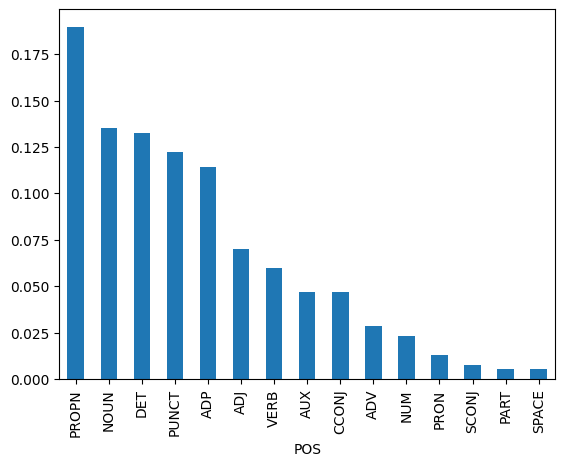

In [15]:
# we need to load in the plotting and dataframes library
import matplotlib.pyplot as plt
import pandas

# create the plot
data = df
fig, ax = plt.subplots()

# Extract the column we need, "POS", and count how many times each
# POS appears, and normalise the values
data['POS'].value_counts(normalize=True).plot(ax=ax, kind='bar')

We can also do the same with the text and count how many times each word appears in the text

<Axes: xlabel='Text'>

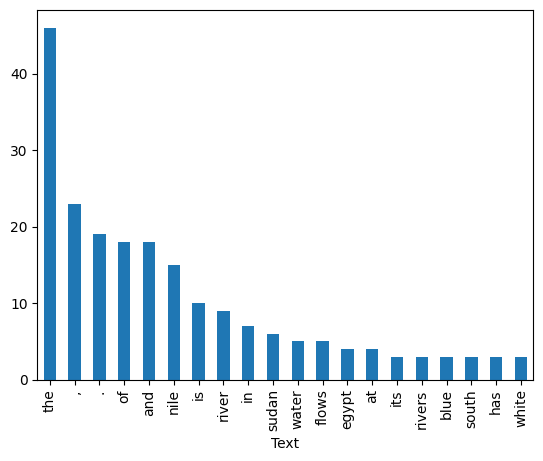

In [16]:

# Extract the column we need, "POS", and count how many times each
# POS appears.   This time we need to limit the number of words displayed
# otherwise the plot will have a long tail.
# We use head(n=20) to display the top 20 words used.
fig, ax = plt.subplots()
df['Text'].str.lower().value_counts().head(n=20).plot(ax=ax, kind='bar')

Unfortunatly punctuation is some of the highest usage.  If we do not want punctuation to be counted in the word
count, we can exclude it as so:

<Axes: xlabel='Text'>

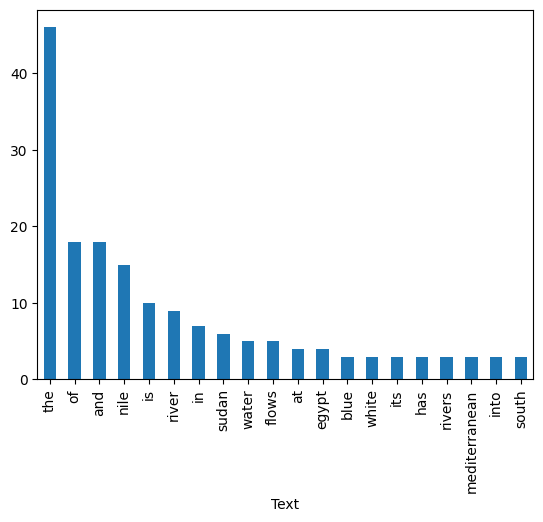

In [24]:
fig, ax = plt.subplots()
df.loc[df['POS']!='PUNCT', 'Text'].str.lower().value_counts().head(n=20).plot(ax=ax, kind='bar')

## Comparison of frequency

One useful analysis is to compare the frequency of words apperances in two different texts.  To do this we will need to load in both sets (the new one is the wikipedia article on the river Danube).

We will load in both texts, and pass them through the tagger, then we will save just the words and P.O.S. from each text.

In [18]:
import pandas as pd

text = []
pos = []

with open('Nile.txt') as f:
    contents = f.read()
    output_doc = nlp(contents)
    for token in output_doc:
        text.append(token.text)
        pos.append(token.pos_)

nile_data = pd.DataFrame({'Text': text, 'POS': pos})


text = []
pos = []
    
with open('danube.txt') as f:
    contents = f.read()
    output_doc = nlp(contents)
    for token in output_doc:
        text.append(token.text)
        pos.append(token.pos_)

danube_data = pd.DataFrame({'Text': text, 'POS': pos})


Now we need to clean up the text.  We will place a filter on the dataframe to exclude any row where the POS column is either 'PUNCT' or 'SPACE' to remove white space and punctuation.   Then we will ensure all text is lower case and count how many occurances of each type there are.

In [19]:
nile_data_cleaned = nile_data.loc[(nile_data['POS']!='PUNCT') & (nile_data['POS'] != 'SPACE'), 'Text'].str.lower().value_counts()

danube_data_cleaned = danube_data.loc[(danube_data['POS']!='PUNCT') & (danube_data['POS']!='SPACE'), 'Text'].str.lower().value_counts()

Now we need to combine the datasets and keep only entries where the word occurs in both text.  We then limit this to the top 20 words.

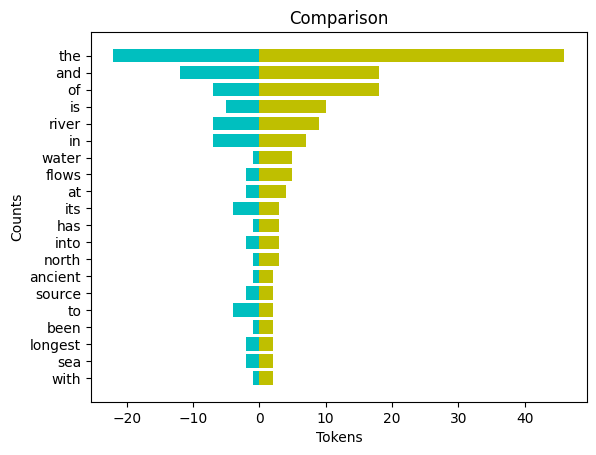

In [20]:
comparison = pd.concat([nile_data_cleaned, danube_data_cleaned], axis=1, join = "inner").head(n=20)

comparison.columns = ['Nile', 'Danube']

import numpy as np
import matplotlib.pyplot as plt

plt.barh(comparison.index[::-1], comparison["Nile"][::-1], align='center', color = 'y')
plt.barh(comparison.index[::-1], -comparison["Danube"][::-1], align='center', color = 'c')
plt.title("Comparison")
plt.ylabel("Counts")
plt.xlabel("Tokens")
plt.show()
#help(plt.barh)




## Keyness value

In [26]:
import math 

def keyness(a, b, c, d):
    E1 = c * (a + b) / (c + d)
    E2 = d * (a + b) / (c + d)
    G2 = 2 * ( (a*math.log(a/E1) ) + (b * math.log(b/E2)) )
    return G2
    
#keyness(250, 500, 500, 700)


danube_total = danube_data_cleaned.sum()
nile_total = nile_data_cleaned.sum()

comparison["keyness"] = comparison.apply(lambda x: keyness(x["Nile"], x["Danube"], nile_total, danube_total), axis=1)

269
336


In [25]:
comparison

,Nile,Danube,keyness
Text,,,
the,46,22,4.157371
and,18,12,0.243933
of,18,7,2.871796
is,10,5,0.772092
river,9,7,0.003296
in,7,7,0.172760
water,5,1,2.095473
flows,5,2,0.747467
at,4,2,0.308837


In [22]:
# Install a pip package in the current Jupyter kernel
import sys 
!{sys.executable} -m pip install wordcloud
from wordcloud import WordCloud

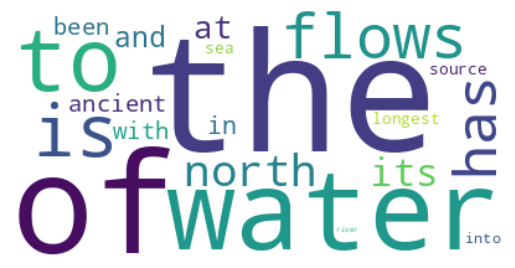

In [23]:
wordcloud = WordCloud(background_color="white").generate_from_frequencies(comparison["keyness"])
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()